In [12]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
# Read in csv file :
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
metrics_data = pd.read_csv('/Users/rachitajain/Desktop/Viacom/data/key_metrics_data_file.csv')
products_data = pd.read_csv('/Users/rachitajain/Desktop/Viacom/data/products_data_file.csv')

In [4]:
metrics_data.head()

,date,page_views,visits,unique_visitors,bounce_rate
0,"(2012,01,01)",0,0,0,inf
1,"(2012,01,02)",0,0,0,inf
2,"(2012,01,03)",0,0,0,inf
3,"(2012,01,04)",0,0,0,inf
4,"(2012,01,05)",0,0,0,inf


Check for Null values

In [23]:
metrics_data.isnull().sum(axis = 0)

date               0
page_views         0
visits             0
unique_visitors    0
bounce_rate        0
dtype: int64

Remove Infinity values

In [31]:
metrics_data = metrics_data[~metrics_data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [32]:
metrics_data

,date,page_views,visits,unique_visitors,bounce_rate
281,"(2012,10,08)",1,1,1,1.000000
289,"(2012,10,16)",4,3,1,0.666667
290,"(2012,10,17)",32,11,9,0.272727
291,"(2012,10,18)",550680,185607,181942,0.310538
292,"(2012,10,19)",7384524,2522740,2366966,0.314636
...,...,...,...,...,...
726,"(2013,12,27)",6328774,2395841,2256768,0.359512
727,"(2013,12,28)",6189963,2333545,2194440,0.364722
728,"(2013,12,29)",6183667,2313966,2176780,0.359718
729,"(2013,12,30)",6469028,2441133,2300662,0.360552


In [5]:
products_data.head()

,country,city,product_name,page_views,visits
0,United States,"los angeles (California, United States)",::unspecified::,4418,1924
1,United States,"los angeles (California, United States)",AVG AntiVirus Free 2014,369,135
2,United States,"los angeles (California, United States)",Avast Free Antivirus 2014,269,189
3,United States,"los angeles (California, United States)",Advanced SystemCare,246,104
4,United States,"los angeles (California, United States)",Free Mouse Auto Clicker,243,80


Page Views and Visits by Countries

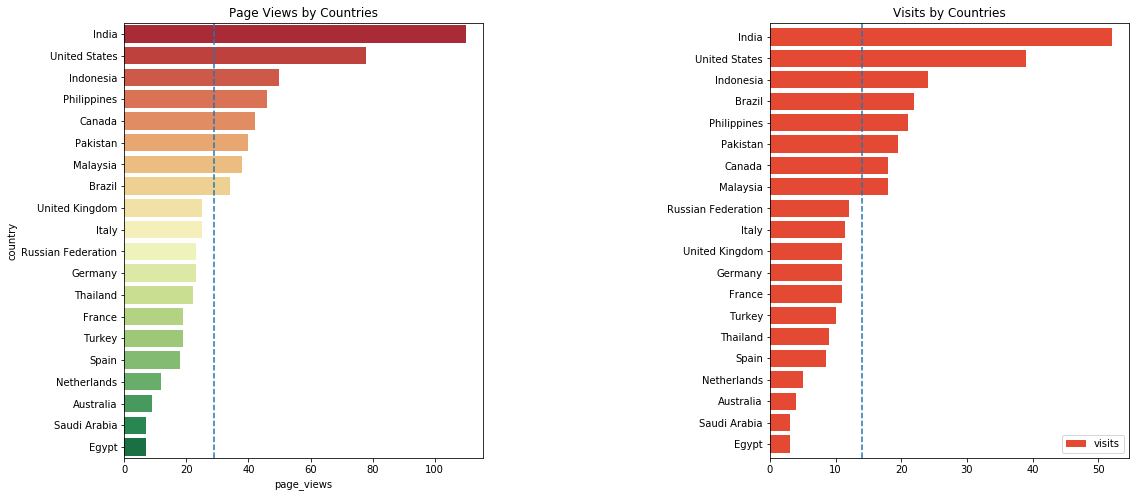

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sal_coun=products_data.groupby('country')['page_views'].median().sort_values(ascending=False).to_frame()
sns.barplot('page_views',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
ax[0].axvline(products_data['page_views'].median(),linestyle='dashed')
ax[0].set_title('Page Views by Countries')

max_coun=products_data.groupby('country')['visits'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(sal_coun.index)]
max_coun.sort_values(by='visits',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(products_data['visits'].median(),linestyle='dashed')
ax[1].set_title('Visits by Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.subplots_adjust(wspace=0.8)
plt.show()

Bounce rate distribution

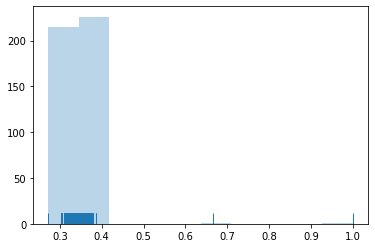

In [34]:
#Histogram:
plt.hist(metrics_data.bounce_rate, alpha=.3)
sns.rugplot(metrics_data.bounce_rate);